<a href="https://colab.research.google.com/github/Sailex-Salam/Plant_disease_detection_with-me/blob/main/Plant_diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2
import os
import random
from matplotlib import pyplot as plt

In [2]:
directory = r'/content/drive/MyDrive/Plant/Train/Train'
categories = ['Healthy','Powdery', 'Rust']

In [3]:
data = []

In [4]:
for category in categories:
  folder = os.path.join(directory, category)
  label = categories.index(category)
  for img in os.listdir(folder):
    img_path = os.path.join(folder, img)
    img_arr = cv2.imread(img_path)
    img_arr = cv2.resize(img_arr,(200,200))
    data.append([img_arr, label])

In [5]:
random.shuffle(data)

In [6]:
x = []
y = []

In [7]:
for features, label in data:
  x.append(features)
  y.append(label)

In [8]:
x = np.array(x)
y = np.array(y)

In [9]:
x = x/255

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense

In [22]:
model = Sequential()

In [23]:
x.shape

(1332, 200, 200, 3)

In [24]:
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,input_shape= x.shape[1:], activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [25]:
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'accuracy')

In [26]:
model.fit(x,y,epochs = 15, validation_split = 0.2)

Epoch 1/15
34/34 [==============================] - 5s 74ms/step - loss: 0.8996 - accuracy: 0.5324 - val_loss: 0.7055 - val_accuracy: 0.6442
Epoch 2/15
34/34 [==============================] - 2s 60ms/step - loss: 0.6359 - accuracy: 0.7127 - val_loss: 0.8738 - val_accuracy: 0.5655
Epoch 3/15
34/34 [==============================] - 2s 54ms/step - loss: 0.6891 - accuracy: 0.7023 - val_loss: 0.7075 - val_accuracy: 0.7154
Epoch 4/15
34/34 [==============================] - 2s 60ms/step - loss: 0.4891 - accuracy: 0.8225 - val_loss: 0.2850 - val_accuracy: 0.9064
Epoch 5/15
34/34 [==============================] - 2s 64ms/step - loss: 0.2436 - accuracy: 0.9136 - val_loss: 0.2455 - val_accuracy: 0.8914
Epoch 6/15
34/34 [==============================] - 2s 60ms/step - loss: 0.1400 - accuracy: 0.9559 - val_loss: 0.1738 - val_accuracy: 0.9326
Epoch 7/15
34/34 [==============================] - 2s 60ms/step - loss: 0.0948 - accuracy: 0.9671 - val_loss: 0.3584 - val_accuracy: 0.8914
Epoch 8/15
34

In [27]:
model.save('/content/drive/MyDrive/Models/plant_disease.model')

42/42 [==============================] - 1s 20ms/step
The plant suffers from powdery


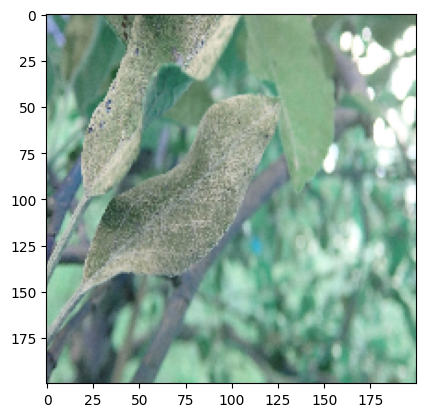

In [30]:
plt.imshow(x[20])
prediction = model.predict(x)
k = np.argmax(prediction[20])
if k == 0:
  print("The plant is in good health")
elif  k==1:
  print("The plant suffers from powdery")
elif k==2:
  print("The plant suffers from rusty")